<a href="https://colab.research.google.com/github/michailprev/Data-Analysis/blob/main/laptop_price__notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('laptop_price__dataset.csv')

df.drop(columns=['Unnamed: 0'], inplace=True)
df['Price'] = df['Price'] * 0.011 # convert the currency unit from Indian Rupees to Euros

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,526.850755
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,336.996000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1487.148696
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888


# Handling missing data
## Count missing data

In [ ]:
df.isna().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

## Identify missing data
For easy and quick identification of entries with missing values in the dataset, we create the following plot in which cells of the table with missing values are presented in blue color (qualitatively)

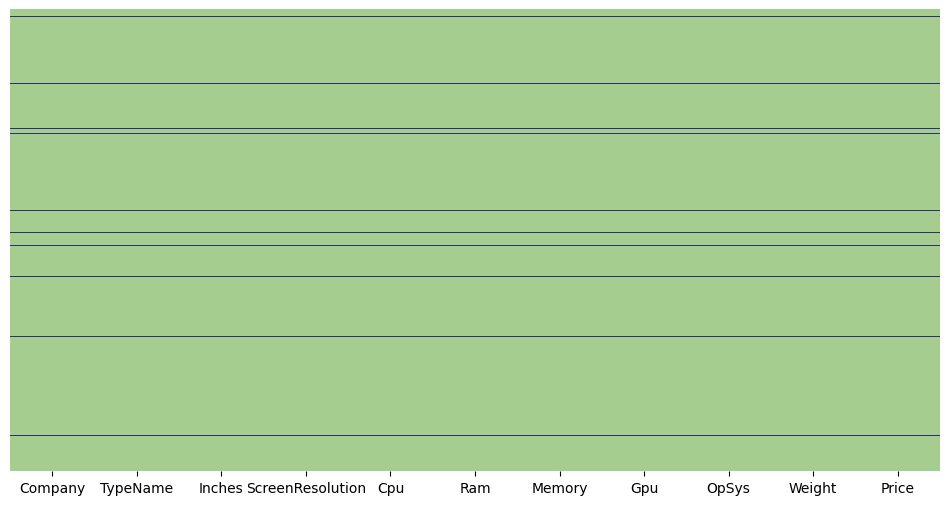

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

sns.heatmap(df.isnull(),cbar=False, cmap='crest',yticklabels=False)
plt.show()

## Remove missing data

In [ ]:
df.dropna(inplace=True)

# Reset indexes

In [ ]:
df.reset_index(drop=True)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,526.850755
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,336.996000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1487.148696
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888
...,...,...,...,...,...,...,...,...,...,...,...
1268,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,373.919040
1269,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,878.533920
1270,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,134.212320
1271,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,447.765120


# Checking data consistency

In [ ]:
# Get unique values of each column
unique_values_per_column = {col: df[col].unique() for col in df.columns}

for col, unique_values in unique_values_per_column.items():
    print(f"{col}: {unique_values}")

Company: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeName: ['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
Inches: ['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']
ScreenResolution: ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 '1600x900' 'IPS Panel 4K Ultra HD 3840x2160' '4K 

## Checking data type of each column

In [ ]:
#df.dtypes

### Correct data type of column `Inches`

In [ ]:
# check if values are numerical ...
is_numeric = pd.to_numeric(df['Inches'], errors='coerce').notnull()
# else remove them
df = df[is_numeric]

# change column data type
df['Inches'] = df['Inches'].astype(float)

df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

## Processing Column `ScreenResolution`
Validate categories of column

In [ ]:
dt = df['ScreenResolution'].sort_values().drop_duplicates().tolist()
print(len(dt))
dt

40


['1366x768',
 '1440x900',
 '1600x900',
 '1920x1080',
 '2560x1440',
 '4K Ultra HD / Touchscreen 3840x2160',
 '4K Ultra HD 3840x2160',
 'Full HD / Touchscreen 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel 1366x768',
 'IPS Panel 2560x1440',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'IPS Panel 4K Ultra HD 3840x2160',
 'IPS Panel Full HD / Touchscreen 1920x1080',
 'IPS Panel Full HD 1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 1920x1200',
 'IPS Panel Full HD 2160x1440',
 'IPS Panel Full HD 2560x1440',
 'IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel Quad HD+ 2560x1440',
 'IPS Panel Quad HD+ 3200x1800',
 'IPS Panel Retina Display 2304x1440',
 'IPS Panel Retina Display 2560x1600',
 'IPS Panel Retina Display 2736x1824',
 'IPS Panel Retina Display 2880x1800',
 'IPS Panel Touchscreen / 4K Ultra HD 3840x2160',
 'IPS Panel Touchscreen 1366x768',
 'IPS Panel Touchscreen 1920x1200',
 'IPS Panel Touchscreen 2400x1600',
 'IPS Panel Touchscreen 2560x1440',
 'Quad HD

Correct categories of column

In [ ]:
df['ScreenResolution'].replace('Touchscreen / 4K Ultra HD 3840x2160','4K Ultra HD / Touchscreen 3840x2160', inplace = True)
df['ScreenResolution'].replace('Touchscreen / Full HD 1920x1080','Full HD / Touchscreen 1920x1080', inplace = True)
df['ScreenResolution'].replace('Touchscreen / Quad HD+ 3200x1800','Quad HD+ / Touchscreen 3200x1800', inplace = True)
df['ScreenResolution'].replace('IPS Panel Touchscreen / 4K Ultra HD 3840x2160','IPS Panel 4K Ultra HD / Touchscreen 3840x2160', inplace = True)

# check results
dt = df['ScreenResolution'].sort_values().drop_duplicates().tolist()
print(len(dt))
dt

36


['1366x768',
 '1440x900',
 '1600x900',
 '1920x1080',
 '2560x1440',
 '4K Ultra HD / Touchscreen 3840x2160',
 '4K Ultra HD 3840x2160',
 'Full HD / Touchscreen 1920x1080',
 'Full HD 1920x1080',
 'IPS Panel 1366x768',
 'IPS Panel 2560x1440',
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
 'IPS Panel 4K Ultra HD 3840x2160',
 'IPS Panel Full HD / Touchscreen 1920x1080',
 'IPS Panel Full HD 1366x768',
 'IPS Panel Full HD 1920x1080',
 'IPS Panel Full HD 1920x1200',
 'IPS Panel Full HD 2160x1440',
 'IPS Panel Full HD 2560x1440',
 'IPS Panel Quad HD+ / Touchscreen 3200x1800',
 'IPS Panel Quad HD+ 2560x1440',
 'IPS Panel Quad HD+ 3200x1800',
 'IPS Panel Retina Display 2304x1440',
 'IPS Panel Retina Display 2560x1600',
 'IPS Panel Retina Display 2736x1824',
 'IPS Panel Retina Display 2880x1800',
 'IPS Panel Touchscreen 1366x768',
 'IPS Panel Touchscreen 1920x1200',
 'IPS Panel Touchscreen 2400x1600',
 'IPS Panel Touchscreen 2560x1440',
 'Quad HD+ / Touchscreen 3200x1800',
 'Quad HD+ 3200x1800',

# Create new columns (split column `Cpu`) [1]
The `Cpu` column contains data for both the model and CPU speed. Our objective is to split this column into two separate columns, one for the CPU model (`CpuModel`) and another for the CPU speed (`CpuSpeed`).

In [ ]:
df[['CpuModel', 'CpuSpeed']] = df['Cpu'].str.rsplit(n=1, expand=True)
df.drop(columns=['Cpu'], inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515,Intel Core i5,2.3GHz
1,Apple,Ultrabook,13.3,1440x900,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,526.850755,Intel Core i5,1.8GHz
2,HP,Notebook,15.6,Full HD 1920x1080,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,336.996000,Intel Core i5 7200U,2.5GHz
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1487.148696,Intel Core i7,2.7GHz
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888,Intel Core i5,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,373.919040,Intel Core i7 6500U,2.5GHz
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,878.533920,Intel Core i7 6500U,2.5GHz
1300,Lenovo,Notebook,14.0,1366x768,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,134.212320,Intel Celeron Dual Core N3050,1.6GHz
1301,HP,Notebook,15.6,1366x768,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,447.765120,Intel Core i7 6500U,2.5GHz


# Create new columns (split column `Memory`) [2]
The `Memory` column contains data for both type and memory capacity. Our objective is to split this column into two seperate columns, one for memory type (`MemoryType`) and another for memory capacity (`MemorySize`).

In [ ]:
df[['MemorySize', 'MemoryType']] = df['Memory'].str.split(n=1, expand=True)
df.drop(columns=['Memory'], inplace=True)
df

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515,Intel Core i5,2.3GHz,128GB,SSD
1,Apple,Ultrabook,13.3,1440x900,8GB,Intel HD Graphics 6000,macOS,1.34kg,526.850755,Intel Core i5,1.8GHz,128GB,Flash Storage
2,HP,Notebook,15.6,Full HD 1920x1080,8GB,Intel HD Graphics 620,No OS,1.86kg,336.996000,Intel Core i5 7200U,2.5GHz,256GB,SSD
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16GB,AMD Radeon Pro 455,macOS,1.83kg,1487.148696,Intel Core i7,2.7GHz,512GB,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888,Intel Core i5,3.1GHz,256GB,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4GB,Intel HD Graphics 520,Windows 10,1.8kg,373.919040,Intel Core i7 6500U,2.5GHz,128GB,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16GB,Intel HD Graphics 520,Windows 10,1.3kg,878.533920,Intel Core i7 6500U,2.5GHz,512GB,SSD
1300,Lenovo,Notebook,14.0,1366x768,2GB,Intel HD Graphics,Windows 10,1.5kg,134.212320,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage
1301,HP,Notebook,15.6,1366x768,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,447.765120,Intel Core i7 6500U,2.5GHz,1TB,HDD


# Create new columns (split column `ScreenResolution`) [3]
The `ScreenResolution` column contains data for both type and screen resolution (px). Our objective is to split this column into two seperate columns, one for screen type (`ScreenType`) and another for screen resolution (`ScreenResolutionPx`).

In [ ]:
df['ScreenResolutionPx'] = df['ScreenResolution'].apply(lambda x: str(x).rsplit()[-1])
df['ScreenType'] = df['ScreenResolution'].apply(lambda x: ' '.join(str(x).rsplit()[:-1]) if len(str(x).rsplit()) > 0 else None)
df.drop(columns=['ScreenResolution'], inplace=True)
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType,ScreenResolutionPx,ScreenType
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515,Intel Core i5,2.3GHz,128GB,SSD,2560x1600,IPS Panel Retina Display
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,526.850755,Intel Core i5,1.8GHz,128GB,Flash Storage,1440x900,
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,336.996000,Intel Core i5 7200U,2.5GHz,256GB,SSD,1920x1080,Full HD
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,1487.148696,Intel Core i7,2.7GHz,512GB,SSD,2880x1800,IPS Panel Retina Display
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888,Intel Core i5,3.1GHz,256GB,SSD,2560x1600,IPS Panel Retina Display
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4GB,Intel HD Graphics 520,Windows 10,1.8kg,373.919040,Intel Core i7 6500U,2.5GHz,128GB,SSD,1920x1080,IPS Panel Full HD / Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,16GB,Intel HD Graphics 520,Windows 10,1.3kg,878.533920,Intel Core i7 6500U,2.5GHz,512GB,SSD,3200x1800,IPS Panel Quad HD+ / Touchscreen
1300,Lenovo,Notebook,14.0,2GB,Intel HD Graphics,Windows 10,1.5kg,134.212320,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage,1366x768,
1301,HP,Notebook,15.6,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,447.765120,Intel Core i7 6500U,2.5GHz,1TB,HDD,1366x768,


# Create new columns (split column `ScreenType`) [4]

The `ScreenType` column contains data about display monitor specifications. Our objective is to split this column into two seperate columns, one for `IPS Panel` and another for `Touchscreen`.

*working on `IPS Panel` column*

In [ ]:
df['ScreenPanel'] = df['ScreenType'].apply(lambda x: 'IPS Panel' if 'IPS Panel' in x else '')
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType,ScreenResolutionPx,ScreenType,ScreenPanel
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515,Intel Core i5,2.3GHz,128GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,526.850755,Intel Core i5,1.8GHz,128GB,Flash Storage,1440x900,,
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,336.996000,Intel Core i5 7200U,2.5GHz,256GB,SSD,1920x1080,Full HD,
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,1487.148696,Intel Core i7,2.7GHz,512GB,SSD,2880x1800,IPS Panel Retina Display,IPS Panel
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888,Intel Core i5,3.1GHz,256GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4GB,Intel HD Graphics 520,Windows 10,1.8kg,373.919040,Intel Core i7 6500U,2.5GHz,128GB,SSD,1920x1080,IPS Panel Full HD / Touchscreen,IPS Panel
1299,Lenovo,2 in 1 Convertible,13.3,16GB,Intel HD Graphics 520,Windows 10,1.3kg,878.533920,Intel Core i7 6500U,2.5GHz,512GB,SSD,3200x1800,IPS Panel Quad HD+ / Touchscreen,IPS Panel
1300,Lenovo,Notebook,14.0,2GB,Intel HD Graphics,Windows 10,1.5kg,134.212320,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage,1366x768,,
1301,HP,Notebook,15.6,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,447.765120,Intel Core i7 6500U,2.5GHz,1TB,HDD,1366x768,,


*Modify column `Touchscreen`*

In [ ]:
df['Touchscreen'] = df['ScreenType'].apply(lambda x: 'Touchscreen' if 'Touchscreen' in x else '')
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,CpuModel,CpuSpeed,MemorySize,MemoryType,ScreenResolutionPx,ScreenType,ScreenPanel,Touchscreen
0,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,785.165515,Intel Core i5,2.3GHz,128GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel,
1,Apple,Ultrabook,13.3,8GB,Intel HD Graphics 6000,macOS,1.34kg,526.850755,Intel Core i5,1.8GHz,128GB,Flash Storage,1440x900,,,
2,HP,Notebook,15.6,8GB,Intel HD Graphics 620,No OS,1.86kg,336.996000,Intel Core i5 7200U,2.5GHz,256GB,SSD,1920x1080,Full HD,,
3,Apple,Ultrabook,15.4,16GB,AMD Radeon Pro 455,macOS,1.83kg,1487.148696,Intel Core i7,2.7GHz,512GB,SSD,2880x1800,IPS Panel Retina Display,IPS Panel,
4,Apple,Ultrabook,13.3,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1057.053888,Intel Core i5,3.1GHz,256GB,SSD,2560x1600,IPS Panel Retina Display,IPS Panel,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4GB,Intel HD Graphics 520,Windows 10,1.8kg,373.919040,Intel Core i7 6500U,2.5GHz,128GB,SSD,1920x1080,IPS Panel Full HD / Touchscreen,IPS Panel,Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,16GB,Intel HD Graphics 520,Windows 10,1.3kg,878.533920,Intel Core i7 6500U,2.5GHz,512GB,SSD,3200x1800,IPS Panel Quad HD+ / Touchscreen,IPS Panel,Touchscreen
1300,Lenovo,Notebook,14.0,2GB,Intel HD Graphics,Windows 10,1.5kg,134.212320,Intel Celeron Dual Core N3050,1.6GHz,64GB,Flash Storage,1366x768,,,
1301,HP,Notebook,15.6,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,447.765120,Intel Core i7 6500U,2.5GHz,1TB,HDD,1366x768,,,


# Rearrange columns

In [ ]:
df = df[['Company','TypeName','Inches','ScreenResolutionPx','ScreenType','MemorySize','MemoryType','CpuModel','CpuSpeed','Ram','Gpu','OpSys','Price','ScreenPanel','Touchscreen']]
df

,Company,TypeName,Inches,ScreenResolutionPx,ScreenType,MemorySize,MemoryType,CpuModel,CpuSpeed,Ram,Gpu,OpSys,Price,ScreenPanel,Touchscreen
0,Apple,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,128GB,SSD,Intel Core i5,2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,785.165515,IPS Panel,
1,Apple,Ultrabook,13.3,1440x900,,128GB,Flash Storage,Intel Core i5,1.8GHz,8GB,Intel HD Graphics 6000,macOS,526.850755,,
2,HP,Notebook,15.6,1920x1080,Full HD,256GB,SSD,Intel Core i5 7200U,2.5GHz,8GB,Intel HD Graphics 620,No OS,336.996000,,
3,Apple,Ultrabook,15.4,2880x1800,IPS Panel Retina Display,512GB,SSD,Intel Core i7,2.7GHz,16GB,AMD Radeon Pro 455,macOS,1487.148696,IPS Panel,
4,Apple,Ultrabook,13.3,2560x1600,IPS Panel Retina Display,256GB,SSD,Intel Core i5,3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1057.053888,IPS Panel,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,IPS Panel Full HD / Touchscreen,128GB,SSD,Intel Core i7 6500U,2.5GHz,4GB,Intel HD Graphics 520,Windows 10,373.919040,IPS Panel,Touchscreen
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,IPS Panel Quad HD+ / Touchscreen,512GB,SSD,Intel Core i7 6500U,2.5GHz,16GB,Intel HD Graphics 520,Windows 10,878.533920,IPS Panel,Touchscreen
1300,Lenovo,Notebook,14.0,1366x768,,64GB,Flash Storage,Intel Celeron Dual Core N3050,1.6GHz,2GB,Intel HD Graphics,Windows 10,134.212320,,
1301,HP,Notebook,15.6,1366x768,,1TB,HDD,Intel Core i7 6500U,2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,447.765120,,


# Grouping data by manufacturer
Group sales by manufacturer and order by average product sale price

In [ ]:
df1 = df.groupby('Company')['Price'].mean().reset_index()
df1.sort_values('Price', ascending=False, inplace=True)
df1.columns = ['Company','MeanPrice']
df1.reset_index(drop=True, inplace=True)
df1

,Company,MeanPrice
0,Razer,1961.107406
1,LG,1230.181920
2,MSI,1009.960038
3,Google,983.246880
4,Microsoft,944.941668
5,Apple,916.745499
6,Huawei,834.577920
7,Samsung,828.391520
8,Toshiba,734.221072
9,Dell,693.105319


### Group sales by manufacturer and caclulate min, max and average product price

In [ ]:
agg_functions = {'Price': ['mean', 'max', 'min']}
df2 = df.groupby('Company').agg(agg_functions).reset_index()
df2['Price'] = df2['Price'].round(2)
df2

Company    Price                  
                  mean      max      min
0        Acer   367.34  1523.22   101.98
1       Apple   916.75  1675.02   526.85
2        Asus   648.70  2329.67   116.63
3       Chuwi   184.20   263.15   143.58
4        Dell   693.11  2144.70   161.11
5     Fujitsu   424.32   468.28   380.37
6      Google   983.25  1288.79   747.25
7          HP   629.36  2572.31   122.49
8      Huawei   834.58   878.53   790.62
9          LG  1230.18  1347.40  1112.97
10     Lenovo   638.80  2871.21   134.21
11        MSI  1009.96  1640.44   491.72
12   Mediacom   172.89   227.99   140.07
13  Microsoft   944.94  1517.36   579.63
14      Razer  1961.11  3574.50   603.08
15    Samsung   828.39  1083.66   157.66
16    Toshiba   734.22  1640.44   261.98
17       Vero   127.43   152.38   114.87
18     Xiaomi   664.30   820.48   547.98

## Note
Create a `pivot_table` for better understanding of data relastionships of sales between `manufacturer` and `computer type`.

In [ ]:
pivot_mean_df = df.pivot_table(index='Company', columns='TypeName', values='Price', aggfunc='mean')
pivot_mean_df = pivot_mean_df.round(2)
pivot_mean_df.fillna('', inplace=True)
pivot_mean_df

TypeName,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
Company,,,,,,
Acer,409.52,860.44,179.34,316.57,521.9,
Apple,,,,,916.75,
Asus,572.24,1009.39,170.53,367.53,756.18,
Chuwi,,,,184.2,,
Dell,665.12,1124.33,304.47,504.78,869.52,1289.54
Fujitsu,,,,424.32,,
Google,,,,,983.25,
HP,886.62,834.63,589.99,481.71,912.63,1347.8
Huawei,,,,,834.58,


Create a `heatmap` for better data visualization

<Figure size 1500x800 with 0 Axes>

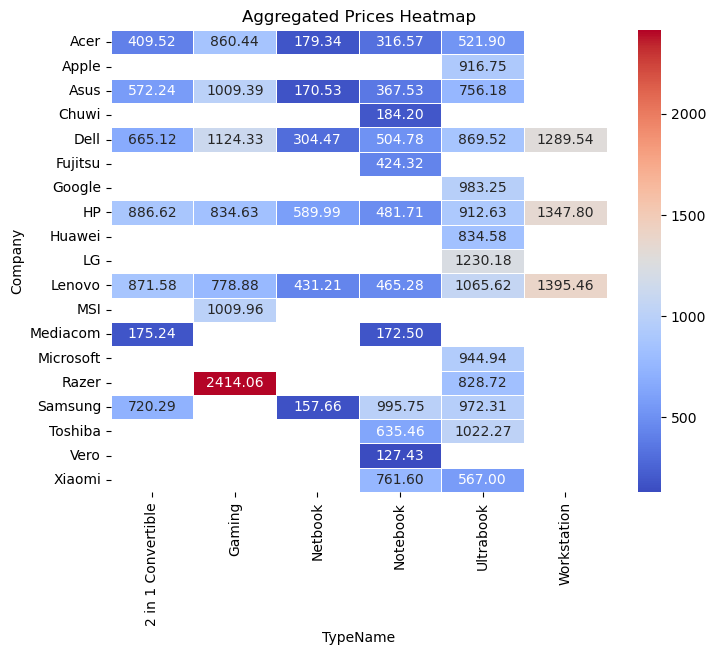

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df.groupby(['Company', 'TypeName'])['Price'].mean().reset_index()
df2['Price'] = df2['Price'].round(2)

# Increase the figure size
plt.figure(figsize=(15, 8))

# Reshape the DataFrame for a heatmap
heatmap_data = df2.pivot(index='Company', columns='TypeName', values='Price')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Aggregated Prices Heatmap')

# Save the plot to a file (in PNG format, adjust the filename as needed)
#plt.savefig('heatmap.png')
plt.show()